# IMPORTING THE MODULES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay




# IMPORTING AND PREPROCESSING OF THE DATASET

In [2]:
train_df = pd.read_csv('UNSW_NB15_train-set.csv')
print(train_df)

            id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  i

In [3]:
test_df = pd.read_csv('UNSW_NB15_test-set.csv')
print(test_df)


          id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90

# Description of the Train Dataset


In [4]:
train_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
train_df.isnull().sum() #To check if there are any missing values in the train dataframe 

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
train_df=train_df.drop(['id'],axis=1)

In [8]:
train_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [9]:
train_df['label'].value_counts() # Count the number of unique values of each class of label- attack or no attack

1    119341
0     56000
Name: label, dtype: int64

In [10]:
train_df['attack_cat'].value_counts() # Count the number of unique values of each class of label- attack or no attack

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

<AxesSubplot: title={'center': 'COUNTS OF ATTACK_CATEGORY OF TRAIN DATA'}, xlabel='attack_category', ylabel='counts'>

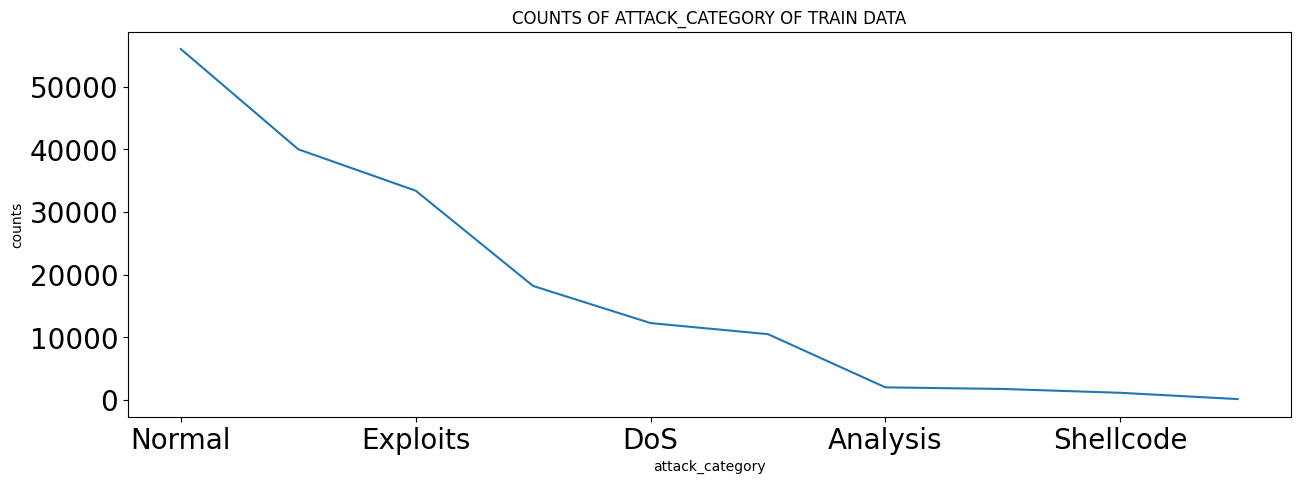

In [11]:
train_df['attack_cat'].value_counts().plot(kind='line', figsize=(15,5), fontsize=20,xlabel='attack_category',ylabel='counts',title='COUNTS OF ATTACK_CATEGORY OF TRAIN DATA')

<AxesSubplot: title={'center': 'COUNTS OF PROTOCOL_TYPE OF TRAIN DATA'}, xlabel='protocol_type', ylabel='counts'>

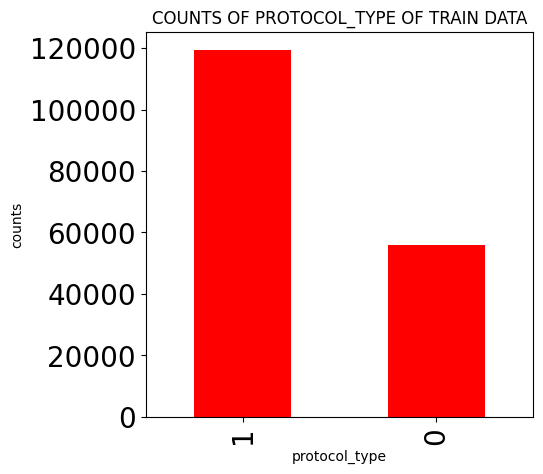

In [12]:
train_df['label'].value_counts().plot(kind='bar',xlabel='protocol_type',ylabel='counts', figsize=(5,5), fontsize=20,color='red',title='COUNTS OF PROTOCOL_TYPE OF TRAIN DATA')

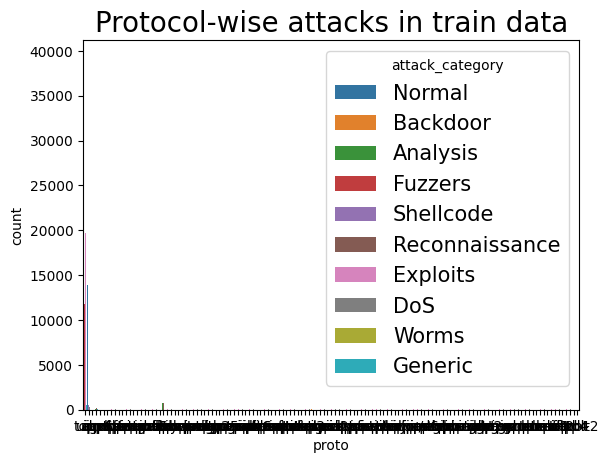

In [13]:
import seaborn as sns
ax = sns.countplot(x="proto", hue="attack_cat", data=train_df)
ax.axes.set_title("Protocol-wise attacks in train data", fontsize=20)
plt.legend(fontsize=15, title="attack_category")


# Description of the Test Dataset

In [14]:
test_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [16]:
test_df.isnull().sum() #To check if there are any missing values in the test dataframe 

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [17]:
test_df=test_df.drop(['id'],axis=1)

In [18]:
test_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [19]:
test_df['label'].value_counts() # Count the number of unique values of each class 

1    45332
0    37000
Name: label, dtype: int64

In [20]:
test_df['attack_cat'].value_counts() # Count the number of unique values of each class 

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

<AxesSubplot: title={'center': 'COUNTS OF PROTOCOL_TYPE OF TRAIN DATA'}, xlabel='protocol_type', ylabel='counts'>

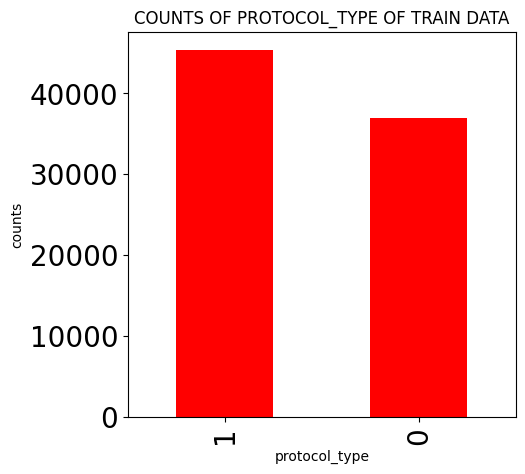

In [21]:
test_df['label'].value_counts().plot(kind='bar',xlabel='protocol_type',ylabel='counts', figsize=(5,5), fontsize=20,color='red',title='COUNTS OF PROTOCOL_TYPE OF TRAIN DATA')

# Splitting into train_x, train_y, test_x, test_y ( for binary)

In [22]:
train_x=train_df.drop(['label'],axis=1)

In [23]:
from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

In [24]:
train_x.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [25]:
test_x=test_df.drop(['label'],axis=1)

In [26]:
test_x.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [27]:
test_x.columns == train_x.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [28]:
# separate categroicals with non categoricals 

categroical_values = train_df.dtypes[train_df.dtypes == object].index.tolist()[:-1]
numerical_values = train_df.dtypes[train_df.dtypes != object].index.tolist()[:-1]

In [29]:
rbs= RobustScaler()
rbs.fit(train_x[numerical_values])

train_x = DataFrame(rbs.transform(train_x[numerical_values]), columns=numerical_values)
train_y = train_df['label'].to_frame(name=None)

test_x = DataFrame(rbs.transform(test_x[numerical_values]), columns=numerical_values)
test_y = test_df['label'].to_frame(name=None)

C:\Users\gpsmu\AppData\Local\Temp\ipykernel_10008\3226329080.py:5: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  train_y = train_df['label'].to_frame(name=None)
C:\Users\gpsmu\AppData\Local\Temp\ipykernel_10008\3226329080.py:8: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  test_y = test_df['label'].to_frame(name=None)


In [30]:
test_x

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.002352,0.0,-0.2,0.050613,-0.148820,0.701650,0.000000,-0.115079,2.019491,-0.051967,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
1,-0.002356,0.0,-0.2,1.021472,-0.148820,0.974449,0.000000,-0.115079,9.902808,-0.051967,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
2,-0.002361,0.0,-0.2,0.489264,-0.148820,1.574607,0.000000,-0.115079,9.603514,-0.051967,...,-0.166667,0.00,0.0,0.000000,0.0,0.0,0.0,-0.285714,-0.1,0.0
3,-0.002359,0.0,-0.2,0.360429,-0.148820,1.307870,0.000000,-0.115079,6.741094,-0.051967,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
4,-0.002353,0.0,-0.2,1.300613,-0.148820,0.774397,0.000000,-0.115079,9.558507,-0.051967,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,-0.002361,0.0,-0.2,-0.250000,-0.148820,1.574607,0.000000,-0.115079,0.926240,-0.051967,...,0.000000,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.142857,-0.3,0.0
82328,1.653321,1.8,0.6,13.521472,0.172414,-0.025618,0.000000,0.884921,-0.008501,0.028554,...,0.000000,0.00,0.0,-0.181818,0.0,0.0,0.0,0.000000,-0.2,0.0
82329,-0.002368,-0.1,-0.2,-0.294479,-0.148820,-0.025813,-1.322917,-0.115079,-0.009898,-0.051967,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0
82330,-0.002368,-0.1,-0.2,-0.294479,-0.148820,-0.025813,-1.322917,-0.115079,-0.009898,-0.051967,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0


In [31]:
numerical_values

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [32]:
categroical_values

['proto', 'service', 'state']

In [33]:
train_categrocials_encoded = pd.get_dummies(train_df[categroical_values])
train_categrocials_encoded['type'] = 'train'

test_categrocials_encoded = pd.get_dummies(test_df[categroical_values])
test_categrocials_encoded['type'] = 'test'

encoded_categorical = pd.concat([train_categrocials_encoded, test_categrocials_encoded]).fillna(0)

train_categrocials_encoded = encoded_categorical[encoded_categorical.type=='train'].drop('type', axis=1).reset_index(drop=True)
test_categrocials_encoded = encoded_categorical[encoded_categorical.type=='test'].drop('type', axis=1).reset_index(drop=True)

train_x = pd.concat([train_categrocials_encoded, train_x], axis=1)
test_x = pd.concat([test_categrocials_encoded, test_x], axis=1)

In [34]:
train_x

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,0.0
1,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,0.2,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,-0.142857,0.2,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00,0.0,0.000000,1.0,1.0,0.0,-0.142857,-0.3,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.25,0.0,3.363636,0.0,0.0,0.0,-0.142857,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,0,0,0,0,0,0,0,0,0,...,3.666667,5.75,6.0,1.909091,0.0,0.0,0.0,3.000000,2.0,0.0
175337,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.3,0.0
175338,0,0,0,0,0,0,0,0,0,0,...,0.166667,0.50,1.0,0.909091,0.0,0.0,0.0,0.000000,0.8,0.0
175339,0,0,0,0,0,0,0,0,0,0,...,4.666667,7.25,6.5,2.454545,0.0,0.0,0.0,3.857143,2.6,0.0


In [35]:
train_y

,label
0,0
1,0
2,0
3,0
4,0
...,...
175336,1
175337,1
175338,1
175339,1


In [36]:
test_x

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
1,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.2,0.0
2,0,0,0,0,0,0,0,0,0,0,...,-0.166667,0.00,0.0,0.000000,0.0,0.0,0.0,-0.285714,-0.1,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.25,0.0,0.000000,0.0,0.0,0.0,-0.142857,-0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00,0.0,-0.090909,0.0,0.0,0.0,-0.142857,-0.3,0.0
82328,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.00,0.0,-0.181818,0.0,0.0,0.0,0.000000,-0.2,0.0
82329,0,0,0,0,0,0,1,0,0,0,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0
82330,0,0,0,0,0,0,1,0,0,0,...,-0.166667,0.00,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,1.0


In [37]:
test_y

,label
0,0
1,0
2,0
3,0
4,0
...,...
82327,0
82328,0
82329,0
82330,0


# 1. DECISION TREE CLASSIFIER

In [38]:
import timeit
#Calculate start time
start = timeit.default_timer()
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=5)
classifier.fit(train_x, train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start


#Calculate start time
start = timeit.default_timer()

pred_y = classifier.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start



              precision    recall  f1-score   support

           0       0.94      0.75      0.83     37000
           1       0.82      0.96      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332

Accuracy: 0.8639411164553272
Precision: 0.873950933849813
Recall: 0.8639411164553272
F1 score: 0.8615267015099873
Train Time(s):  4.157537100021727
Test Time(s):  0.1411272999830544
[[27710  9290]
 [ 1912 43420]]


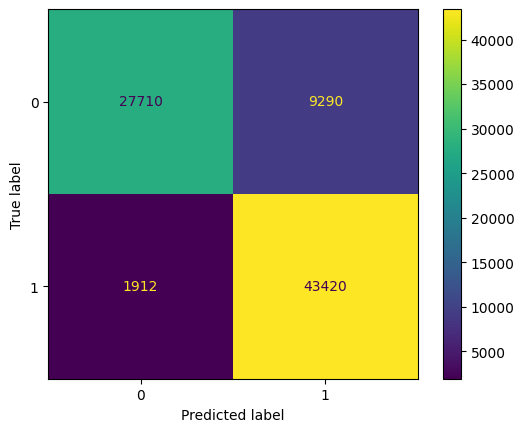

In [39]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()



In [40]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83     37000
           1       0.82      0.96      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332

Accuracy: 0.8639411164553272
Precision: 0.873950933849813
Recall: 0.8639411164553272
F1 score: 0.8615267015099873
Train Time(s):  4.157537100021727
Test Time(s):  0.1411272999830544


In [41]:
train_x.columns[classifier.feature_importances_.argsort()]

Index(['proto_3pc', 'proto_rvd', 'proto_sat-expak', 'proto_sat-mon',
       'proto_sccopmce', 'proto_scps', 'proto_sdrp', 'proto_rtp',
       'proto_secure-vmtp', 'proto_skip',
       ...
       'synack', 'stcpb', 'sinpkt', 'ct_dst_src_ltm', 'tcprtt', 'ct_srv_src',
       'smean', 'sbytes', 'ct_srv_dst', 'sttl'],
      dtype='object', length=196)

In [42]:
classifier.feature_importances_[classifier.feature_importances_.argsort()]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# 2. RANDOM FOREST CLASSIFICATION

# Building the Model

In [43]:
#Calculate start time
start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier_a = RandomForestClassifier(random_state=3)
classifier_a.fit(train_x,train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()
pred_y = classifier_a.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start




C:\Users\gpsmu\AppData\Local\Temp\ipykernel_10008\3733651750.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_a.fit(train_x,train_y)


[[27048  9952]
 [  700 44632]]


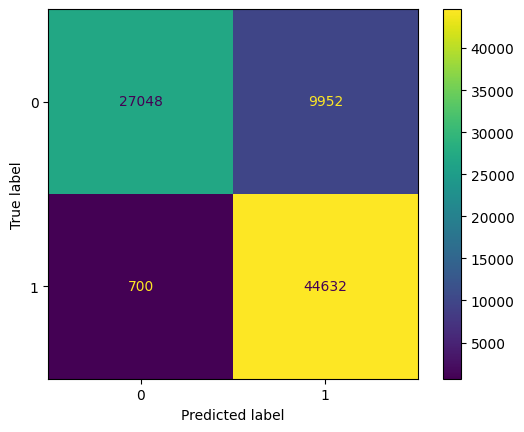

In [44]:
print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [45]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     37000
           1       0.82      0.98      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
weighted avg       0.89      0.87      0.87     82332

Accuracy: 0.8706213865811592
Precision: 0.8882751005981253
Recall: 0.8706213865811592
F1 score: 0.8673678597382012
Train Time(s):  29.886965499958023
Test Time(s):  1.3344226999906823


# 3. LOGISTIC REGRESSION

# Building the Model


In [46]:
#Calculate start time
start = timeit.default_timer()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver= 'lbfgs')
clf.fit(train_x, train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start


#Calculate start time
start = timeit.default_timer()
pred_y = clf.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start


C:\Users\gpsmu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gpsmu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluating the Model

[[16530 20470]
 [ 2195 43137]]


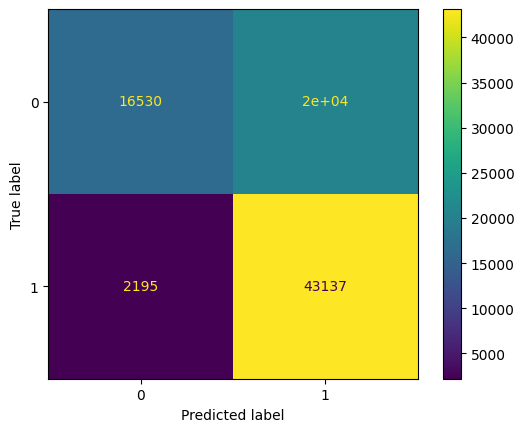

In [47]:
print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [48]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.88      0.45      0.59     37000
           1       0.68      0.95      0.79     45332

    accuracy                           0.72     82332
   macro avg       0.78      0.70      0.69     82332
weighted avg       0.77      0.72      0.70     82332

Accuracy: 0.7247121410873051
Precision: 0.7701259470427482
Recall: 0.7247121410873051
F1 score: 0.7026622275041052
Train Time(s):  5.490513700002339
Test Time(s):  0.0670302000362426


# 4. KNN

# 4.1 Euclidean Distance

# Building the Model

In [49]:
#Calculate start time
start = timeit.default_timer()
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
classifier_knn.fit(train_x,train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()
pred_y = classifier_knn.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

C:\Users\gpsmu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluating the Model


[[27107  9893]
 [ 1743 43589]]


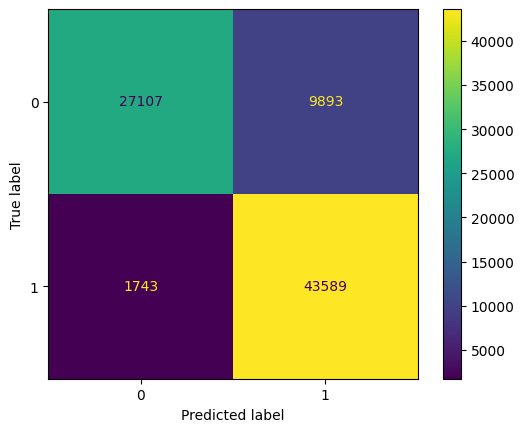

In [50]:
print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [51]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     37000
           1       0.82      0.96      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332

Accuracy: 0.8586697760287616
Precision: 0.8710001185245296
Recall: 0.8586697760287616
F1 score: 0.8557521588560367
Train Time(s):  0.31517040001926944
Test Time(s):  67.72352200001478


# 4.2 Manhattan Distance

In [52]:
#Calculate start time
start = timeit.default_timer()
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan',p=2)
classifier_knn.fit(train_x,train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()
pred_y = classifier_knn.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

C:\Users\gpsmu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluating the Model

[[27266  9734]
 [ 1606 43726]]


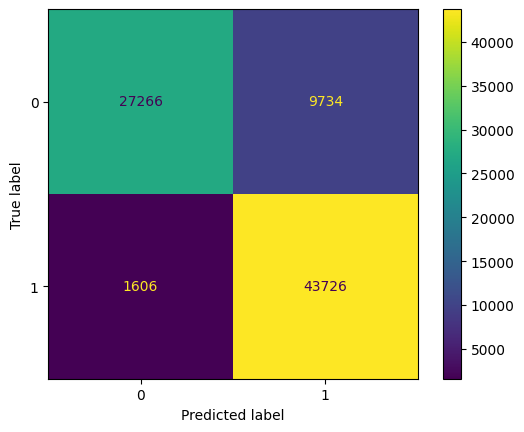

In [53]:
print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [54]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     37000
           1       0.82      0.96      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332

Accuracy: 0.8622649759510276
Precision: 0.8747489206398075
Recall: 0.8622649759510276
F1 score: 0.8594333538868055
Train Time(s):  0.3875778999645263
Test Time(s):  164.73681550001493


# 5. XGBOOST


# Building the Model


In [55]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
#Calculate start time
start = timeit.default_timer()
from xgboost.sklearn import XGBClassifier
boost=XGBClassifier()
boost.fit(train_x,train_y)
#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()
pred_y = boost.predict(test_x)
#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

# Evaluating the Model


[[27530  9470]
 [  732 44600]]


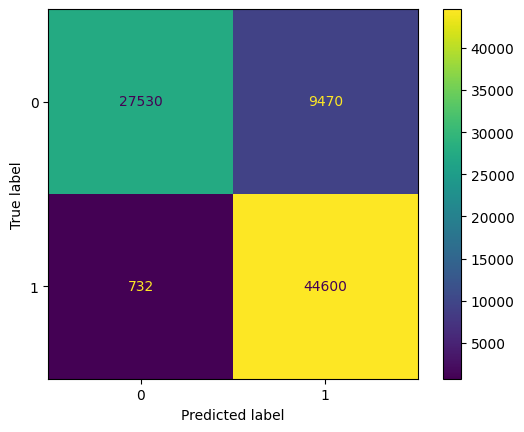

In [57]:
print(confusion_matrix(test_y,pred_y))

cm = confusion_matrix(test_y, pred_y, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [58]:
print(classification_report(test_y,pred_y))
Accuracy_of_Decision_tree=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',Accuracy_of_Decision_tree)
print("Precision:",metrics.precision_score(test_y,pred_y,average='weighted'))
print("Recall:",metrics.recall_score(test_y,pred_y,average='weighted'))
print("F1 score:",metrics.f1_score(test_y,pred_y,average='weighted'))




#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     37000
           1       0.82      0.98      0.90     45332

    accuracy                           0.88     82332
   macro avg       0.90      0.86      0.87     82332
weighted avg       0.89      0.88      0.87     82332

Accuracy: 0.8760870621386582
Precision: 0.8919263937587634
Recall: 0.8760870621386582
F1 score: 0.8732379685609136
Train Time(s):  16.542748200008646
Test Time(s):  0.12445519998436794
